## NEW ZEALAND I: REGIONAL DISPARITY OF BIRTH RATE 

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Set up plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

In [49]:
# Load the dataset
df = pd.read_csv(
    'C:/Users/DELL/DataSet/Births-and-deaths-Year-ended-December-2021-CSV/bd-dec22-births-deaths-by-region.csv')

In [50]:
# =============================================================================
# 1. DATA CLEANING AND BASIC EXPLORATION
# =============================================================================

In [51]:
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe(include='all'))

Dataset Shape: (648, 4)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Period       648 non-null    int64 
 1   Birth_Death  648 non-null    object
 2   Region       648 non-null    object
 3   Count        648 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.4+ KB
None

Basic Statistics:
             Period Birth_Death            Region         Count
count    648.000000         648               648    648.000000
unique          NaN           2                18           NaN
top             NaN      Births  Northland region           NaN
freq            NaN         324                36           NaN
mean    2013.500000         NaN               NaN   5074.287037
std        5.192135         NaN               NaN  11120.228013
min     2005.000000         NaN               NaN      6.000000
25%     2009.000000     

In [52]:
# Check for missing values
print(f"missing values: ")
df.isnull().sum()

missing values: 


Period         0
Birth_Death    0
Region         0
Count          0
dtype: int64

In [53]:
# Check for duplicates
print(f" Duplicate Rows: {df.duplicated().sum()}")

 Duplicate Rows: 0


In [54]:
# Display first and last few rows
print("\nFirst 5 Rows:")
print(df.head(3))
print("\nLast 5 Rows:")
print(df.tail(3))


First 5 Rows:
   Period Birth_Death            Region  Count
0    2005      Births  Northland region   2067
1    2005      Births   Auckland region  20745
2    2005      Births    Waikato region   5667

Last 5 Rows:
     Period Birth_Death                                     Region  Count
645    2022      Deaths                           Southland region    933
646    2022      Deaths  Region not stated or\narea outside region     33
647    2022      Deaths                                New Zealand  38574


In [55]:
# Data cleaning - check unique values in each column
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Each Column:
Period: 18 unique values
Birth_Death: 2 unique values
Region: 18 unique values
Count: 511 unique values


In [56]:
# Clean the 'Region' column - handle the multi-line entry
df['Region'] = df['Region'].str.replace('\n', ' ')

In [57]:
# =============================================================================
# 2. DATA PREPARATION
# =============================================================================

In [58]:
# Create separate dataframes for births
births_df = df[df['Birth_Death'] == 'Births'].copy()

In [59]:
# Filter out 'New Zealand' and 'Region not stated' for regional analysis
regional_births = births_df[~births_df['Region'].str.contains(
    'New Zealand|Region not stated')]

In [60]:
# Explore regional birth and death shape
print(f" Regional births data: {regional_births.shape}")

 Regional births data: (288, 4)


In [61]:
# =============================================================================
# 3: AUCKLAND DOMINANCE & REGIONAL INEQUALITY
# =============================================================================

In [62]:
# Calculate regional shares and trends
regional_births_total = regional_births.groupby(
    'Region')['Count'].sum().sort_values(ascending=False)
regional_births_share = (regional_births_total /
                         regional_births_total.sum()) * 100

# Get yearly trends for major regions
major_regions = ['Auckland region', 'Canterbury region',
                 'Wellington region', 'Waikato region']
regional_trends = regional_births[regional_births['Region'].isin(
    major_regions)]
regional_pivot = regional_trends.pivot_table(
    index='Period', columns='Region', values='Count', aggfunc='sum')

# Remove ' region' from column names for cleaner display
regional_pivot.columns = [col.replace(' region', '')
                          for col in regional_pivot.columns]

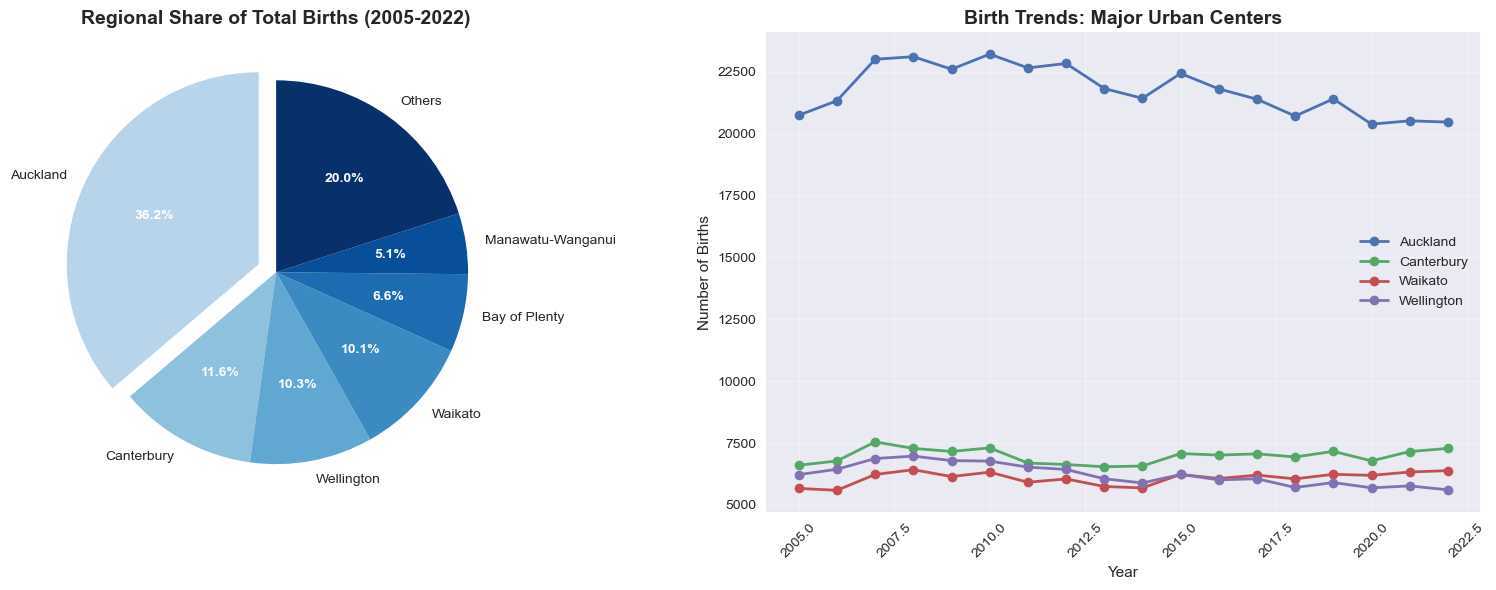

In [63]:
# Plot 1: Regional concentration and trends
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1A: Pie chart showing regional concentration
top_6_regions = regional_births_share.head(6)
other_share = 100 - top_6_regions.sum()
explode = [0.1 if region ==
           'Auckland region' else 0 for region in top_6_regions.index]

labels = [region.replace(' region', '')
          for region in top_6_regions.index] + ['Others']
sizes = list(top_6_regions.values) + [other_share]

wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
                                   explode=list(explode) + [0], colors=plt.cm.Blues(np.linspace(0.3, 1, 7)))
ax1.set_title('Regional Share of Total Births (2005-2022)',
              fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Plot 1B: Major region trends over time
for region in regional_pivot.columns:
    ax2.plot(regional_pivot.index,
             regional_pivot[region], marker='o', linewidth=2, label=region)

ax2.set_title('Birth Trends: Major Urban Centers',
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Births')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

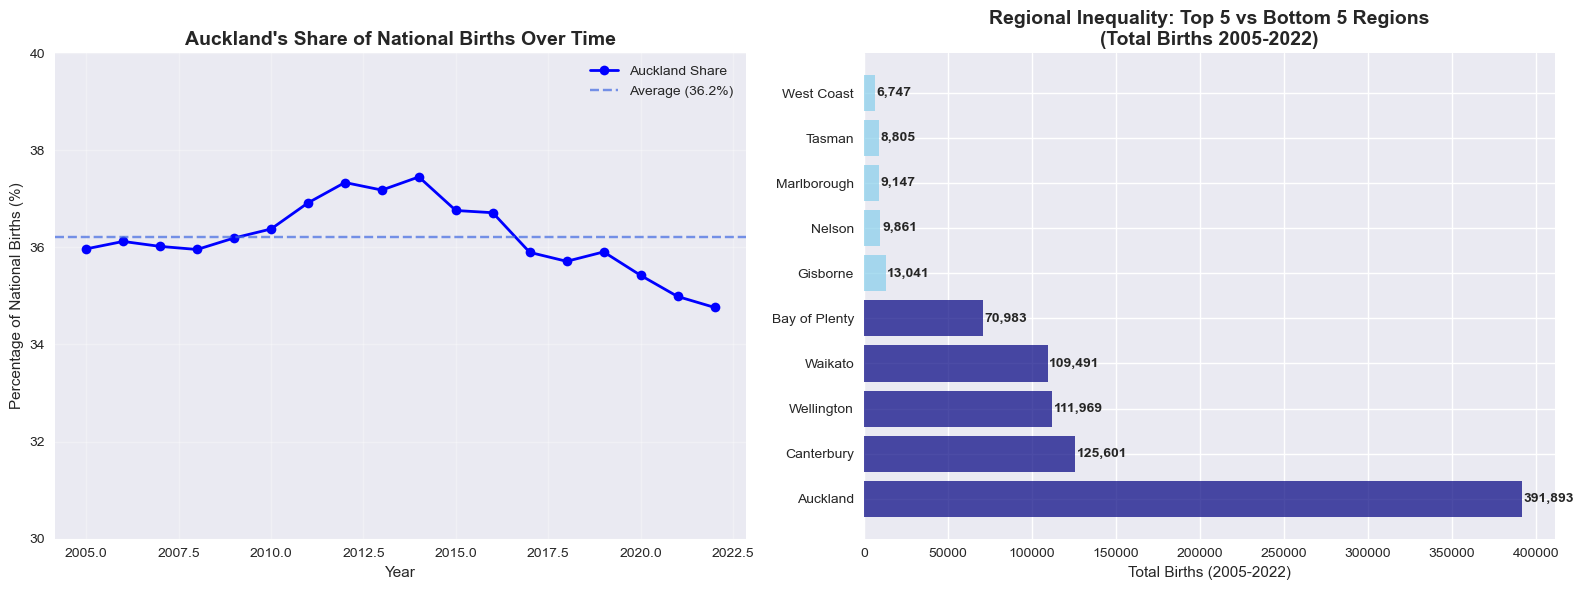


 REGIONAL INEQUALITY STATISTICS:
• Auckland's share of national births: 36.2%
• Ratio to 2nd largest region (Canterbury): 3.1x
• Ratio to 3rd largest region (Wellington): 3.5x
• Top 3 regions account for 58.2% of all births
• Bottom 10 regions account for 20.0% of all births
• Auckland's average yearly births: 21,772
• Smallest region's average yearly births: 375


In [64]:
# Plot 2: Auckland vs Rest of NZ comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 2A: Auckland dominance over time
auckland_share_yearly = regional_births[regional_births['Region'] == 'Auckland region'].groupby('Period')[
    'Count'].sum()
total_births_yearly = regional_births.groupby('Period')['Count'].sum()
auckland_share_pct = (auckland_share_yearly / total_births_yearly) * 100

ax1.plot(auckland_share_pct.index, auckland_share_pct.values,
         marker='o', linewidth=2, color='Blue', label='Auckland Share')
ax1.axhline(y=auckland_share_pct.mean(), color='Royalblue', linestyle='--',
            alpha=0.7, label=f'Average ({auckland_share_pct.mean():.1f}%)')
ax1.set_title("Auckland's Share of National Births Over Time",
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage of National Births (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(30, 40)

# Plot 2B: Regional inequality - top vs bottom regions
top_5_regions = regional_births_total.head(5)
bottom_5_regions = regional_births_total.tail(5)

regions_comparison = pd.concat([top_5_regions, bottom_5_regions])
colors = ['Navy'] * 5 + ['skyblue'] * 5

ax2.barh([idx.replace(' region', '') for idx in regions_comparison.index],
         regions_comparison.values, color=colors, alpha=0.7)
ax2.set_title('Regional Inequality: Top 5 vs Bottom 5 Regions\n(Total Births 2005-2022)',
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Births (2005-2022)')
for i, v in enumerate(regions_comparison.values):
    ax2.text(v + 1000, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


# Regional inequality statistics
auckland_share = regional_births_share['Auckland region']
next_region = regional_births_share.index[1]
next_region_share = regional_births_share.iloc[1]
third_region = regional_births_share.index[2]
third_region_share = regional_births_share.iloc[2]

ratio_to_2nd = auckland_share / next_region_share
ratio_to_3rd = auckland_share / third_region_share

top_3_share = regional_births_share.head(3).sum()
bottom_10_share = regional_births_share.tail(10).sum()

print("\n REGIONAL INEQUALITY STATISTICS:")
print(f"• Auckland's share of national births: {auckland_share:.1f}%")
print(
    f"• Ratio to 2nd largest region ({next_region.replace(' region', '')}): {ratio_to_2nd:.1f}x")
print(
    f"• Ratio to 3rd largest region ({third_region.replace(' region', '')}): {ratio_to_3rd:.1f}x")
print(f"• Top 3 regions account for {top_3_share:.1f}% of all births")
print(f"• Bottom 10 regions account for {bottom_10_share:.1f}% of all births")
print(
    f"• Auckland's average yearly births: {regional_births_total['Auckland region']/18:,.0f}")
print(
    f"• Smallest region's average yearly births: {regional_births_total.min()/18:,.0f}")

In [65]:
# =============================================================================
# 4: COVID-19 IMPACT & RECOVERY PATTERNS
# =============================================================================

In [66]:
# Prepare COVID period analysis
covid_years = [2019, 2020, 2021, 2022]
# Use national totals (rows where Region indicates 'New Zealand') for the national pre-COVID average and national COVID analysis
national_births = births_df[births_df['Region'].str.contains(
    'New Zealand', case=False)].copy()
pre_covid_avg = national_births[national_births['Period'].between(
    2015, 2018)]['Count'].mean()

# Calculate national COVID impact metrics (using national_births)
covid_analysis = national_births[national_births['Period'].isin(
    covid_years)].copy()
covid_analysis['Pre_COVID_Avg'] = pre_covid_avg
covid_analysis['Change_From_Avg'] = covid_analysis['Count'] - pre_covid_avg
covid_analysis['Pct_Change_From_Avg'] = (
    covid_analysis['Change_From_Avg'] / pre_covid_avg) * 100

# Regional COVID impact (regional_births excludes 'New Zealand' and is used for regional comparisons)
regional_covid = regional_births[regional_births['Period'].isin(
    covid_years)].copy()
regional_pre_covid = regional_births[regional_births['Period'].between(
    2015, 2018)].copy()

# Calculate regional recovery patterns
regional_recovery = regional_covid.groupby(
    'Region').agg({'Count': ['mean', 'std']}).round(0)
regional_recovery.columns = ['Avg_COVID_Period', 'Volatility']
regional_pre_covid_avg = regional_pre_covid.groupby('Region')['Count'].mean()
regional_recovery['Pre_COVID_Avg'] = regional_pre_covid_avg
regional_recovery['Recovery_Ratio'] = (
    regional_recovery['Avg_COVID_Period'] / regional_recovery['Pre_COVID_Avg']) * 100
regional_recovery['Change_Amount'] = regional_recovery['Avg_COVID_Period'] - \
    regional_recovery['Pre_COVID_Avg']

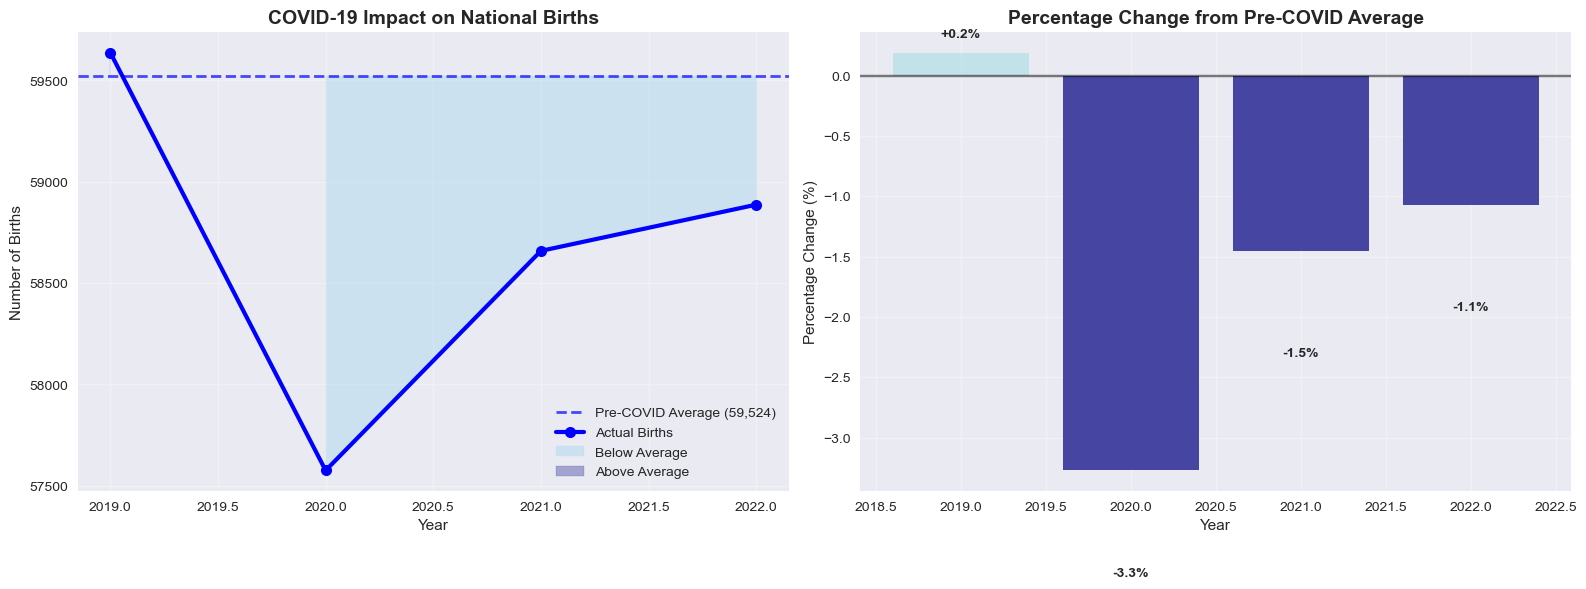

In [67]:
# Plot 1: National COVID impact
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1A: National births with pre-COVID average
ax1.axhline(y=pre_covid_avg, color='Blue', linestyle='--', linewidth=2,
            alpha=0.7, label=f'Pre-COVID Average ({pre_covid_avg:,.0f})')
ax1.plot(covid_analysis['Period'], covid_analysis['Count'], marker='o',
         linewidth=3, markersize=8, label='Actual Births', color='blue')
ax1.fill_between(covid_analysis['Period'], covid_analysis['Count'], pre_covid_avg,
                 where=(covid_analysis['Count'] < pre_covid_avg), color='skyblue', alpha=0.3, label='Below Average')
ax1.fill_between(covid_analysis['Period'], covid_analysis['Count'], pre_covid_avg,
                 where=(covid_analysis['Count'] >= pre_covid_avg), color='Navy', alpha=0.3, label='Above Average')
ax1.set_title('COVID-19 Impact on National Births',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Births')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 1B: Percentage change from pre-COVID average
colors = ['Navy' if x <
          0 else 'powderblue' for x in covid_analysis['Pct_Change_From_Avg']]
bars = ax2.bar(covid_analysis['Period'],
               covid_analysis['Pct_Change_From_Avg'], color=colors, alpha=0.7)
ax2.set_title('Percentage Change from Pre-COVID Average',
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage Change (%)')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, covid_analysis['Pct_Change_From_Avg']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.1 if value >= 0 else -0.8),
             f'{value:+.1f}%', ha='center', va='bottom' if value >= 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

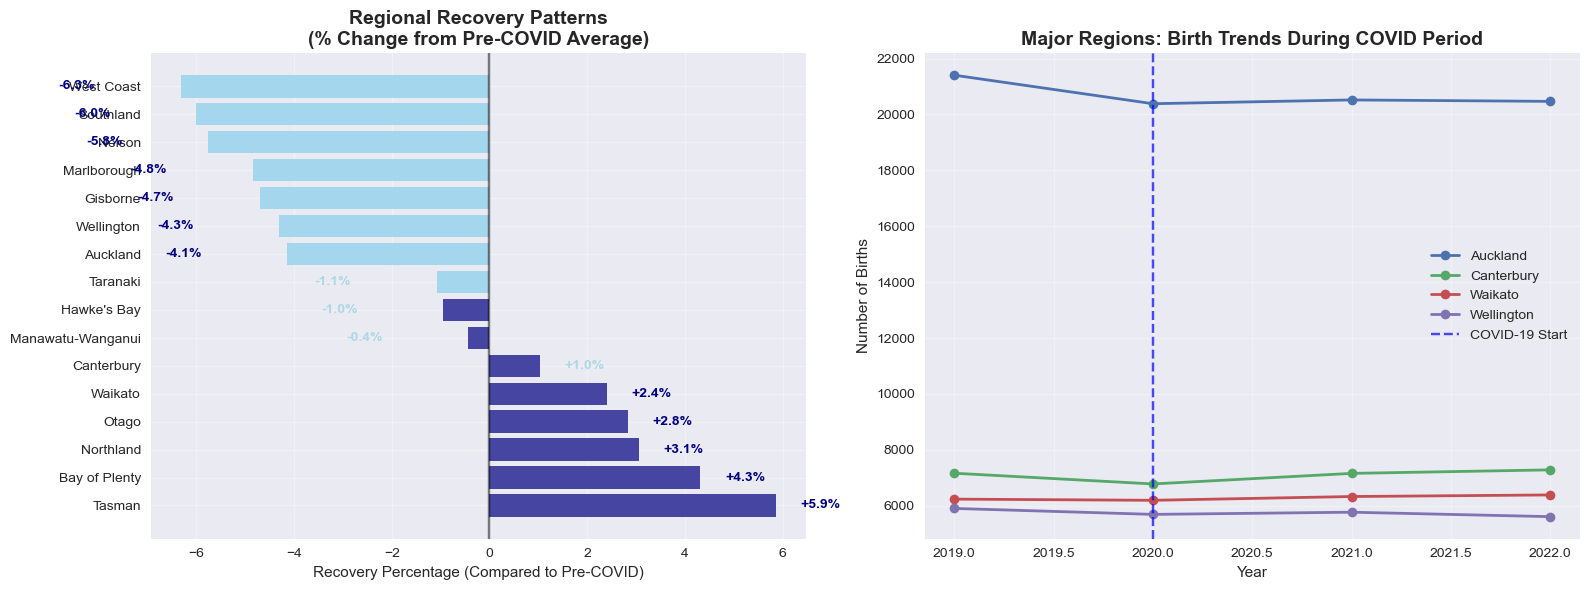


 COVID-19 IMPACT STATISTICS:
• Maximum birth drop: -3.3% in 2020
• 2022 recovery level: -1.1% from pre-COVID average
• Estimated total births lost (2019-2022): 3,336
• Best recovering region: Tasman (+5.9%)
• Worst recovering region: West Coast (-6.3%)
• Regions above pre-COVID levels: 6
• Regions below pre-COVID levels: 10


In [68]:
# Plot 2: Regional recovery patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 2A: Regional recovery ratios (top and bottom performers)
regional_recovery_sorted = regional_recovery.dropna(
).sort_values('Recovery_Ratio', ascending=False)
top_recovering = regional_recovery_sorted.head(8)
bottom_recovering = regional_recovery_sorted.tail(8)
recovery_comparison = pd.concat([top_recovering, bottom_recovering])

# Create horizontal bar chart
y_pos = np.arange(len(recovery_comparison))
colors = ['Navy'] * 8 + ['skyblue'] * 8

ax1.barh(
    y_pos, recovery_comparison['Recovery_Ratio'] - 100, color=colors, alpha=0.7)
ax1.set_yticks(y_pos)
ax1.set_yticklabels([idx.replace(' region', '')
                    for idx in recovery_comparison.index])
ax1.set_xlabel('Recovery Percentage (Compared to Pre-COVID)')
ax1.set_title('Regional Recovery Patterns\n(% Change from Pre-COVID Average)',
              fontsize=14, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.5)
ax1.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(recovery_comparison['Recovery_Ratio'] - 100):
    ax1.text(v + (0.5 if v >= 0 else -2.5), i, f'{v:+.1f}%', va='center',
             fontweight='bold', color='lightblue' if abs(v) < 2 else 'navy')

# Plot 2B: Major regions COVID impact comparison
major_regions_covid = regional_covid[regional_covid['Region'].isin(
    major_regions)]
major_covid_pivot = major_regions_covid.pivot_table(
    index='Period', columns='Region', values='Count', aggfunc='sum')
major_covid_pivot.columns = [col.replace(
    ' region', '') for col in major_covid_pivot.columns]

for region in major_covid_pivot.columns:
    ax2.plot(major_covid_pivot.index,
             major_covid_pivot[region], marker='o', linewidth=2, label=region)

ax2.axvline(x=2020, color='Blue', linestyle='--',
            alpha=0.7, label='COVID-19 Start')
ax2.set_title('Major Regions: Birth Trends During COVID Period',
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Births')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# COVID impact statistics
max_birth_drop = covid_analysis['Pct_Change_From_Avg'].min()
max_birth_drop_year = covid_analysis.loc[covid_analysis['Pct_Change_From_Avg'].idxmin(
), 'Period']
recovery_2022 = covid_analysis[covid_analysis['Period']
                               == 2022]['Pct_Change_From_Avg'].values[0]
total_births_lost = covid_analysis['Change_From_Avg'].sum()

best_recovering_region = top_recovering.index[0].replace(' region', '')
best_recovery_pct = top_recovering['Recovery_Ratio'].iloc[0] - 100
worst_recovering_region = bottom_recovering.index[-1].replace(' region', '')
worst_recovery_pct = bottom_recovering['Recovery_Ratio'].iloc[-1] - 100

print("\n COVID-19 IMPACT STATISTICS:")
print(f"• Maximum birth drop: {max_birth_drop:.1f}% in {max_birth_drop_year}")
print(f"• 2022 recovery level: {recovery_2022:+.1f}% from pre-COVID average")
print(
    f"• Estimated total births lost (2019-2022): {abs(total_births_lost):,.0f}")
print(
    f"• Best recovering region: {best_recovering_region} ({best_recovery_pct:+.1f}%)")
print(
    f"• Worst recovering region: {worst_recovering_region} ({worst_recovery_pct:+.1f}%)")
print(
    f"• Regions above pre-COVID levels: {(regional_recovery['Recovery_Ratio'] > 100).sum()}")
print(
    f"• Regions below pre-COVID levels: {(regional_recovery['Recovery_Ratio'] < 100).sum()}")

In [69]:
# =============================================================================
# 5: KEY INSIGHTS AND CONCLUSION
# =============================================================================

In [70]:
print("""
 MAJOR INSIGHTS:

1. REGIONAL DISPARITIES:
   • Auckland dominates national demographics
   • Significant variation in growth patterns across regions
   • Some smaller regions show population stagnation or decline 

2. TEMPORAL CHANGES:
   • COVID-19 period shows clear impacts on demographics
   • Different regions experienced varying birth rate drop patterns
   • Long-term shifts in regional population distribution

RECOMMENDATIONS:
• Targeted regional development policies
• Healthcare planning for aging populations
• Infrastructure investment in high-growth regions
""")

print("\n ANALYSIS COMPLETED!")
print(f" Dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print(f" Period Covered: {df['Period'].min()} - {df['Period'].max()}")
print(f" Regions Analyzed: {regional_births['Region'].nunique()} regions")
print(f" Country Analyzed: NEW ZEALAND")


 MAJOR INSIGHTS:

1. REGIONAL DISPARITIES:
   • Auckland dominates national demographics
   • Significant variation in growth patterns across regions
   • Some smaller regions show population stagnation or decline 

2. TEMPORAL CHANGES:
   • COVID-19 period shows clear impacts on demographics
   • Different regions experienced varying birth rate drop patterns
   • Long-term shifts in regional population distribution

RECOMMENDATIONS:
• Targeted regional development policies
• Healthcare planning for aging populations
• Infrastructure investment in high-growth regions


 ANALYSIS COMPLETED!
 Dataset: 648 rows, 4 columns
 Period Covered: 2005 - 2022
 Regions Analyzed: 16 regions
 Country Analyzed: NEW ZEALAND
